In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("homeprices.csv")
df.head()

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000


In [5]:
dummy = pd.get_dummies(df.town)

In [7]:
merged = pd.concat([df,dummy], axis ='columns')

In [8]:
merged

,town,area,price,monroe township,robinsville,west windsor
0,monroe township,2600,550000,True,False,False
1,monroe township,3000,565000,True,False,False
2,monroe township,3200,610000,True,False,False
3,monroe township,3600,680000,True,False,False
4,monroe township,4000,725000,True,False,False
5,west windsor,2600,585000,False,False,True
6,west windsor,2800,615000,False,False,True
7,west windsor,3300,650000,False,False,True
8,west windsor,3600,710000,False,False,True
9,robinsville,2600,575000,False,True,False


In [12]:
new_merged=merged.drop(["town","west windsor"],axis="columns")

In [14]:
x = new_merged.drop(["price"] , axis="columns")

In [15]:
x

,area,monroe township,robinsville
0,2600,True,False
1,3000,True,False
2,3200,True,False
3,3600,True,False
4,4000,True,False
5,2600,False,False
6,2800,False,False
7,3300,False,False
8,3600,False,False
9,2600,False,True


In [16]:
y = df.price

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
clf = LinearRegression()

In [19]:
clf.fit(x,y)

LinearRegression()

In [20]:
clf.predict(x)

array([539709.7398409 , 590468.71640508, 615848.20468716, 666607.18125134,
       717366.15781551, 579723.71533005, 605103.20361213, 668551.92431735,
       706621.15674048, 565396.15136531, 603465.38378844, 628844.87207052,
       692293.59277574])

In [21]:
y

0     550000
1     565000
2     610000
3     680000
4     725000
5     585000
6     615000
7     650000
8     710000
9     575000
10    600000
11    620000
12    695000
Name: price, dtype: int64

In [22]:
clf.score(x,y) #accuracy

0.9573929037221871

In [23]:
clf.predict([[3400,0,0]])

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([681241.66845839])

In [82]:
clf.predict([[2800,0,1]])

array([72131855.55794466])

In [25]:
df

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robinsville,2600,575000


In [69]:
dfle = df


In [70]:
from sklearn.preprocessing import LabelEncoder

In [71]:
le = LabelEncoder()

In [72]:
dfle.town = le.fit_transform(dfle.town)

In [73]:
dfle

,town,area,price
0,0,2600,550000
1,0,3000,565000
2,0,3200,610000
3,0,3600,680000
4,0,4000,725000
5,2,2600,585000
6,2,2800,615000
7,2,3300,650000
8,2,3600,710000
9,1,2600,575000


In [74]:
x = dfle.drop(["price"],axis = "columns")
x

,town,area
0,0,2600
1,0,3000
2,0,3200
3,0,3600
4,0,4000
5,2,2600
6,2,2800
7,2,3300
8,2,3600
9,1,2600


In [75]:
y= df.price

In [76]:
from sklearn.preprocessing import OneHotEncoder

from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([('town', OneHotEncoder(), [0])], remainder = 'passthrough')

In [77]:
x= ct.fit_transform(x)
x
x  = x[:,1:]
x

array([[0.0e+00, 0.0e+00, 2.6e+03],
       [0.0e+00, 0.0e+00, 3.0e+03],
       [0.0e+00, 0.0e+00, 3.2e+03],
       [0.0e+00, 0.0e+00, 3.6e+03],
       [0.0e+00, 0.0e+00, 4.0e+03],
       [0.0e+00, 1.0e+00, 2.6e+03],
       [0.0e+00, 1.0e+00, 2.8e+03],
       [0.0e+00, 1.0e+00, 3.3e+03],
       [0.0e+00, 1.0e+00, 3.6e+03],
       [1.0e+00, 0.0e+00, 2.6e+03],
       [1.0e+00, 0.0e+00, 2.9e+03],
       [1.0e+00, 0.0e+00, 3.1e+03],
       [1.0e+00, 0.0e+00, 3.6e+03]])

In [78]:
clf.fit(x,y)

LinearRegression()

In [79]:
clf.predict([[0,1,3400]]) 

array([681241.66845839])

In [80]:
clf.predict([[1,0,2800]]) 

array([590775.63964739])

In [81]:
clf.score(x,y)

0.9573929037221873

In [86]:
df=pd.read_csv("carprices.csv")

In [87]:
df

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


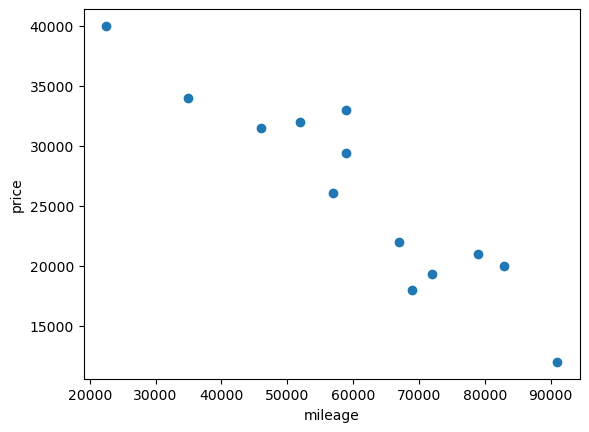

In [94]:
import matplotlib.pyplot as plt
plt.xlabel("mileage")
plt.ylabel("price")
plt.scatter(df.Mileage,df["Sell Price($)"])
plt.show()

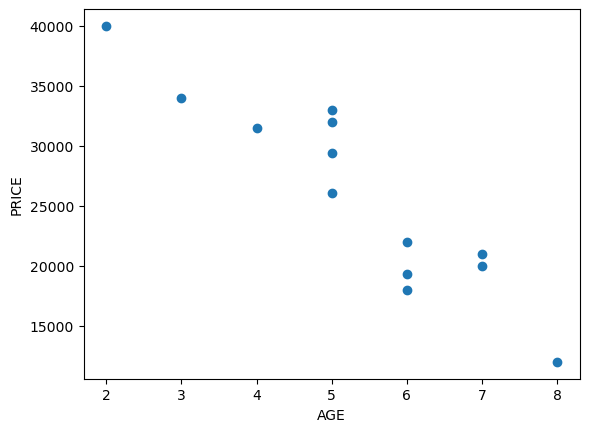

In [97]:
plt.xlabel("AGE")
plt.ylabel("PRICE")
plt.scatter(df["Age(yrs)"],df["Sell Price($)"])
plt.show()

In [99]:
dummy =  pd.get_dummies(df["Car Model"])
dummy

,Audi A5,BMW X5,Mercedez Benz C class
0,False,True,False
1,False,True,False
2,False,True,False
3,False,True,False
4,False,True,False
5,True,False,False
6,True,False,False
7,True,False,False
8,True,False,False
9,False,False,True


In [101]:
merged = pd.concat([df,dummy],axis = "columns")
merged

,Car Model,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5,Mercedez Benz C class
0,BMW X5,69000,18000,6,False,True,False
1,BMW X5,35000,34000,3,False,True,False
2,BMW X5,57000,26100,5,False,True,False
3,BMW X5,22500,40000,2,False,True,False
4,BMW X5,46000,31500,4,False,True,False
5,Audi A5,59000,29400,5,True,False,False
6,Audi A5,52000,32000,5,True,False,False
7,Audi A5,72000,19300,6,True,False,False
8,Audi A5,91000,12000,8,True,False,False
9,Mercedez Benz C class,67000,22000,6,False,False,True


In [102]:
y = df["Sell Price($)"]

In [104]:
x = merged.drop(["Car Model","Sell Price($)","Mercedez Benz C class"], axis = "columns")
x

,Mileage,Age(yrs),Audi A5,BMW X5
0,69000,6,False,True
1,35000,3,False,True
2,57000,5,False,True
3,22500,2,False,True
4,46000,4,False,True
5,59000,5,True,False
6,52000,5,True,False
7,72000,6,True,False
8,91000,8,True,False
9,67000,6,False,False


In [105]:
from sklearn.model_selection import train_test_split

In [107]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=10)

In [110]:
clf.fit(x_train,y_train)

LinearRegression()

In [111]:
clf.predict(x_test)

array([42227.72902773, 24434.07043407, 19085.43933544])

In [112]:
y_test

3     40000
7     19300
11    21000
Name: Sell Price($), dtype: int64

In [115]:
clf.score(x_test,y_test)

0.8675370464375718

In [116]:
clf.predict([[45000,4,0,0]])

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([36871.03077103])

In [117]:
clf.predict([[86000,7,0,1]])

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([12537.34643735])